# Inferencia estadística en python (Intervalos de confianza)

In [1]:
import numpy as np
import random
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Función para la distribución de probabilidad empírica

def ecdf (data):
    "Función para la distribución de probabilidad empírica"
    x = np.sort(data)
    n = len(data)
    y = np.arange(1,n+1)/n
    
    return x, y


# Se crea una función para unir dos conjuntos de datos y permutarlos en una muestra

def permutation_sample(data1, data2):
    """Genera una muestra permutada de dos conjuntos de datos"""

    # Concatena los conjuntos en una variable llamada data
    data = np.concatenate((data1,data2))

    # Permuta el arreglo en una variable llamada permuted_data
    permuted_data = np.random.permutation(data)

    # Particiona el arreglo en dos muestras: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

# Intervalos de confianza

## 1. Entendiendo el intervalo de confianza como una analogía 

Ejemplo 1:

Un ingeniero de petróleos desea conocer la porosidad de una formación para estimar la reserva total de petróleo a 9500 pies. Debido al alto costo para poder acceder a las rocas, él solo contará con 12 muestras. Las directivas de la empresa desean cono cer el peor y mejor escenario para tomar decisiones e inversión (p10 - p90). De la muestra se obtuvo una porosidad media del 14.5% y desviación estándar del 4.3%. Asumiendo que la porosidad se distribuye de manera normal, se da un intervlo así:

In [5]:
IC = stats.t.interval(0.8, 12-1, loc=14.5, scale=4.3/np.sqrt(12))
print("La prosodidad estará entre:", IC," con una confianza del 80%")

La prosodidad estará entre: (12.807569748569543, 16.19243025143046)  con una confianza del 80%


A continuación se presenta un escenario en el que se toman 12 muestras para 100 profundidades, esto con el objetivo de evidenciar los intervalos de confianza

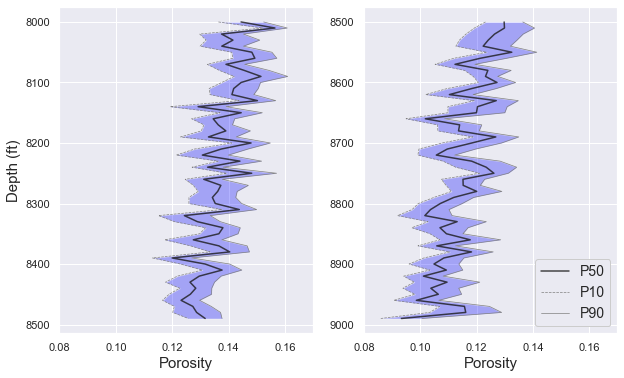

In [12]:
depth = [i * 10 + 8000 for i in range(100)]
l = len(depth)
avg_por = []
p10_por = []
p90_por = []
for i, item in enumerate(depth):

    # Se recolectan 12 rocas por cada una de las profundidades
    # Se asume que la porosidad se distribuye de manera normal
    sample_size = 12
    por_samples = np.random.normal(loc=0.15 - i/2000, scale=0.022, size=sample_size)
    avg_por.append(np.mean(por_samples))

    # intervalo de confianza del 80% para la media
    p10, p90 = stats.t.interval(1 - 0.2, sample_size - 1, loc=np.mean(por_samples), scale=stats.sem(por_samples))
    p10_por.append(p10)
    p90_por.append(p90)

# Visualizar los intervalos de confianza para todas las profundidades
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

ax[0].plot(avg_por[:l//2], depth[:l//2], 'k', label='P50', alpha=0.8)
ax[0].plot(p10_por[:l//2], depth[:l//2], 'grey', linewidth=0.7, label='P10', linestyle='--')
ax[0].plot(p90_por[:l//2], depth[:l//2], 'grey', linewidth=0.7, label='P90')

ax[0].set_xlim(0.08, 0.17)
ax[0].set_ylabel('Depth (ft)', fontsize=15)
ax[0].set_xlabel('Porosity', fontsize=15)
ax[0].fill_betweenx(depth[:l//2], p10_por[:l//2], p90_por[:l//2], facecolor="blue", alpha=0.3)
ax[0].invert_yaxis()

ax[1].plot(avg_por[l//2:], depth[l//2:], 'k', label='P50', alpha=0.8)
ax[1].plot(p10_por[l//2:], depth[l//2:], 'grey', linewidth=0.7, label='P10', linestyle='--')
ax[1].plot(p90_por[l//2:], depth[l//2:], 'grey', linewidth=0.7, label='P90')

ax[1].set_xlim(0.08, 0.17)
ax[1].set_xlabel('Porosity', fontsize=15)
ax[1].legend(loc='best', fontsize=14, framealpha=1, frameon=True)
ax[1].fill_betweenx(depth[l//2:], p10_por[l//2:], p90_por[l//2:], facecolor='blue', alpha=0.3)
ax[1].invert_yaxis()

## 2. Elementos a tener en cuenta en los intervalos de confianza

**1.** Los intervalos de confianza cuantifican la incertidumbre de la estimación estadística asociada a la diferencia entre la muestra y la población

**2.** Los intervalos de confianza son el insumo para las pruebas estadísticas paramétricas

**3.** Un intervalo de confianza del 95% no quiere decir que el 95% de las observación están dentro del intervalo. El 95% se refiere a la confianza de contener al parámetro de poblacional 

**4.** Cuando el tamaño de la muestra es mayor a 30 la distribución de probabilidad converge a una distribuciión normal, en caso de ser menor se debe considerar la distribución t-student

**5.** El margen de error decrece en la media que aumente el tamaño de la muestra, es decir, están inversamente relacionados

### 2.1 Intervalo de confianza para una población

La formulación empleada para el cálculo de los intervalos de confianza está dada por:


* <font color='green'>Intervalo de confianza para la media con varianza conocida</font>
    
$$IC_{media} = \mu \pm (Z_{\alpha/2}\times\dfrac{\sigma}{\sqrt{n}})$$

* <font color='green'>Intervalo de confianza para la media con varianza desconocida</font>

$$IC_{media} = \mu \pm (t_{\alpha/2;gl}\times\dfrac{s}{\sqrt{n}})$$
$$gl = n-1$$

* <font color='green'>Intervalo de confianza para la proporción</font>

$$IC_{prop} = \hat{p} \pm (t_{\alpha/2;gl}\times{\sqrt{\dfrac{\hat{p}(1-\hat{p})}{n}})}$$

* <font color='green'>Intervalo de confianza para la varianza</font>

$$IC_{var} = \dfrac{(n-1)s^2}{\chi^2_{\alpha/2}} \leq \sigma^2 \leq \dfrac{(n-1)s^2}{\chi^2_{1- \alpha/2}}$$

## **Ejemplo**: 
### Intervalo de confianza para la media

In [22]:
np.random.seed(42)

x = np.random.normal(loc=74, scale=4.3, size=20) # Se crea una muestra aleatoria tamaño 20, media 74 y desviación estándar 4.3

alpha = 0.05                # Significancia
n = len(x)                  # Tamaño de la muestra
gl = len(x)-1               # Grados de libertad
media = np.mean(x)          # Media de la muestra
desv = np.std(x,ddof=1)     # Desviación estándar muestral. El valor de ddof es el delta en los grados de libertad (n-1)
t = stats.t.ppf(1-alpha/2, gl) # Valor crítico de t

inf = media - t*desv/np.sqrt(n) # Cálculo del límite inferior
sup = media + t*desv/np.sqrt(n) # Cálculo del límite inferior

print(inf,sup)

# También se puede hacer uso de la función del paquete stats para establecer el intervalo de confianza
print(stats.t.interval(1-alpha,gl,media,desv/np.sqrt(n)))

71.33139551903422 75.19543685256606
(71.33139551903422, 75.19543685256606)


### 2.2 Intervalo de confianza para dos poblaciones

## 3. Bootstrap (re-muestreo)

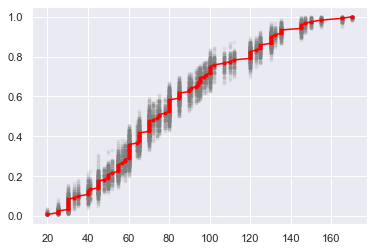

In [7]:
np.random.seed(18)

idx = random.sample(list(df.index),120)
muestra = df.iloc[idx]["Attack"]

for i in range(100):
    bs_muestra = np.random.choice(muestra,len(muestra))
    x, y = ecdf(bs_muestra)
    _ = plt.plot(x, y, marker=".", alpha=0.1, color="gray", linestyle="none")
    
x, y = ecdf(muestra)    
_ = plt.plot(x, y, marker=".", color="red")

In [8]:
# Se crea una función para determinar un estadístico en una muestra por bootstrap
def bootstrap_replicate_1d(data,func):
    "Estadístico para una muestra bootstrap de una dimensión"
    bs_sample = np.random.choice(data,len(data))
    return func(bs_sample)

# Función para almacenar múltiples estaísticas en un único arreglo

def draw_bs_reps(data, func, size=1):
    "Visualizar los estadísticos"
    bs_replicates = np.empty(size)
    
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)
    return bs_replicates    

 El error estándar 3.222 corresponde a la desviación estándar de la distribución de las medias 3.207


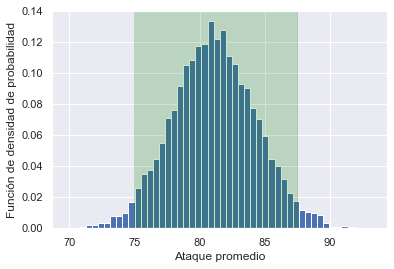

In [9]:
bs_media = draw_bs_reps(muestra,np.mean,10000)

# Calcular el error estándar de la media (desviación estándar de la distribución)
SEM = np.std(muestra)/np.sqrt(len(muestra))

# Computar la desviación estándar de las múltiples muestras
bs_std = np.std(bs_media)
print(" El error estándar %0.3f corresponde a la desviación estándar de la distribución de las medias %0.3f"
     %(SEM, bs_std))

# Visualizar la distribución de las medias
_ = plt.hist(bs_media, bins=50, density = True)
plt.xlabel("Ataque promedio")
plt.ylabel("Función de densidad de probabilidad")

conf_int = np.percentile(bs_media,[2.5,97.5])
plt.axvspan(conf_int[0], conf_int[1],color="green", alpha=0.2)
plt.show()

In [10]:
# Intervalo de confianza

confianza = 0.95
gl = muestra.size -1 
media = np.mean(muestra)
sem = stats.sem(muestra)
interalo = stats.norm.interval(confianza, media, sem)
print(interalo)

interalo_2 = stats.t.interval(confianza, gl, media, sem)
print(interalo_2)

(74.82539293930814, 87.5079403940252)
(74.76024521047205, 87.5730881228613)


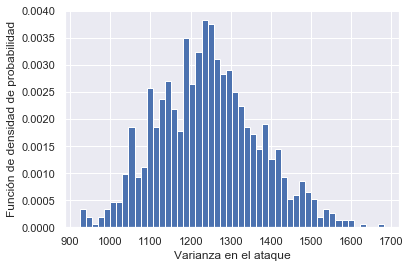

In [11]:
# Varianza

bs_var = draw_bs_reps(muestra,np.var,1000)

# Visualizar la distribución de la varianza 

_ = plt.hist(bs_var, bins=50, density = True)
plt.xlabel("Varianza en el ataque")
plt.ylabel("Función de densidad de probabilidad")
plt.show()

## Bondad de ajuste

Inicialmente se desea comparar si dos conjuntos siguen la misma distribución de datos. En este caso se desea comparar si el ataque de dos generaciones de pokemon siguen la misma distribución

In [3]:
# Importar datos

df = pd.read_csv("Pokemon.csv",index_col=0)
G_2 = df[df.Generation ==2].copy() # Se seleccionan los pokemon de la generación 2
G_5 = df[df.Generation ==5].copy() # Se seleccionan los pokemon de la generación 5

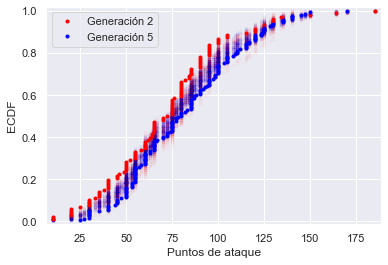

In [4]:
Attack_2 = G_2.Attack
Attack_5 = G_5.Attack

for i in range(50):
    
    # Generar muestras permutadas
    perm_sample_1, perm_sample_2 = permutation_sample(Attack_2,Attack_5)


    # Computar la distribución acumulada empírica
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Gráficar las distribuciones acumuladas para ambas muestras
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Gráficar las distribuciones acumuladas para los datos originales

x_1, y_1 = ecdf(Attack_2)
x_2, y_2 = ecdf(Attack_5)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red',label= "Generación 2")
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue',label= "Generación 5")

# Asignar nombre a los ejes, ajustar el margen y leyenda para las generaciones

plt.margins(0.02)
_ = plt.xlabel('Puntos de ataque')
_ = plt.ylabel('ECDF')
plt.legend()
plt.show()

## Pruebas de hipótesis